In [40]:
# RNN 영화 리뷰 긍정 부정

time: 328 µs (started: 2024-09-17 14:17:11 +00:00)


In [41]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.22 s (started: 2024-09-17 14:17:11 +00:00)


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 460 µs (started: 2024-09-17 14:17:14 +00:00)


In [43]:
train = pd.read_csv('/content/drive/MyDrive/data/trainData.tsv', sep='\t')
test = pd.read_csv('/content/drive/MyDrive/data/testData.tsv', sep='\t')

time: 820 ms (started: 2024-09-17 14:17:14 +00:00)


In [44]:
from bs4 import BeautifulSoup # HTML이나 XML 파일을 파싱하고 필요한 데이터를 추출하는 데 사용되는 라이브러리; 웹 크롤링이나 데이터 전처리에서 많이 사용됨.

bs = BeautifulSoup(train['review'][0])
print(bs.text)
# 훈련 데이터셋에서 첫번째 리뷰를 한번 가져와봤음. 데이터가 어떻게 생겼는지 보기 위해
# csv 할때 head() 랑 같은 맥락.

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 min

In [45]:
import re

cleaned = re.sub('[^a-zA-Z]', ' ', bs.text) # 알파벳 대소문자를 제외한 모든 문자를 공백 처리함.
cleaned

'With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

time: 4.5 ms (started: 2024-09-17 14:17:14 +00:00)


In [46]:
# 대문자 -> 소문자

cleaned = cleaned.lower()
cleaned

'with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for    mi

time: 2.73 ms (started: 2024-09-17 14:17:14 +00:00)


In [47]:
# 불용어 stopwords -> 학습에 불필요한 문자들을 의미함

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

time: 5.48 ms (started: 2024-09-17 14:17:14 +00:00)


In [48]:
from nltk.corpus import stopwords

eng_stop = stopwords.words('english') # 영어 불용어를 가져와서

time: 1.12 ms (started: 2024-09-17 14:17:14 +00:00)


In [49]:
# 내 리뷰 문장 속 단어들 중에 불용어가 아닌 것만 봐봄.
for word in cleaned.split():
  if word not in eng_stop:
    print(word)


stuff
going
moment
mj
started
listening
music
watching
odd
documentary
watched
wiz
watched
moonwalker
maybe
want
get
certain
insight
guy
thought
really
cool
eighties
maybe
make
mind
whether
guilty
innocent
moonwalker
part
biography
part
feature
film
remember
going
see
cinema
originally
released
subtle
messages
mj
feeling
towards
press
also
obvious
message
drugs
bad
kay
visually
impressive
course
michael
jackson
unless
remotely
like
mj
anyway
going
hate
find
boring
may
call
mj
egotist
consenting
making
movie
mj
fans
would
say
made
fans
true
really
nice
actual
feature
film
bit
finally
starts
minutes
excluding
smooth
criminal
sequence
joe
pesci
convincing
psychopathic
powerful
drug
lord
wants
mj
dead
bad
beyond
mj
overheard
plans
nah
joe
pesci
character
ranted
wanted
people
know
supplying
drugs
etc
dunno
maybe
hates
mj
music
lots
cool
things
like
mj
turning
car
robot
whole
speed
demon
sequence
also
director
must
patience
saint
came
filming
kiddy
bad
sequence
usually
directors
hate
working

In [50]:
# 자주 써야 하므로 함수화 시켜둠.
def preprocess(sentence):
  soup = BeautifulSoup(sentence, 'html.parser')
  cleaned = re.sub('[^a-zA-Z]', ' ', soup.text)
  cleaned = cleaned.lower()
  cleaned = [word for word in cleaned.split() if word not in eng_stop]
  return ' '.join(cleaned)

time: 465 µs (started: 2024-09-17 14:17:15 +00:00)


In [51]:
preprocess(train.iloc[0].review)

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

time: 4.5 ms (started: 2024-09-17 14:17:15 +00:00)


In [52]:
train_clean = train['review'].apply(preprocess)

<ipython-input-50-2c958277048e>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence, 'html.parser')


time: 28.9 s (started: 2024-09-17 14:17:15 +00:00)


In [53]:
## Tokenizer

time: 319 µs (started: 2024-09-17 14:17:43 +00:00)


In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<OOV>') # out of vocabulary 토큰까지 포함하여 전처리
tokenizer.fit_on_texts(train_clean) # 모두 토큰화

time: 2.27 s (started: 2024-09-17 14:17:43 +00:00)


In [55]:
len(tokenizer.word_index)

74066

time: 3.88 ms (started: 2024-09-17 14:17:46 +00:00)


In [56]:
## 학습용, 검증 데이터 분리

time: 173 µs (started: 2024-09-17 14:17:46 +00:00)


In [57]:
train_label = train['sentiment']
train_label.head()

,sentiment
0,1
1,1
2,0
3,0
4,1


time: 4.39 ms (started: 2024-09-17 14:17:46 +00:00)


In [58]:
from sklearn.model_selection import train_test_split

train_sentence, val_sentence, train_label, val_label = train_test_split(train_clean, train_label, test_size=0.2, random_state=42)

train_sentence.shape, val_sentence.shape

((20000,), (5000,))

time: 7.77 ms (started: 2024-09-17 14:17:46 +00:00)


In [59]:
train_sentence.head()

,review
23311,movie plain dumb casting ralph meeker mike ham...
23623,dahmer young confused man dahmer confusing mov...
1020,may saints preserve us movie going help someon...
12645,combination reading novella viewing film inspi...
1533,daniel day lewis left foot gives us one best p...


time: 10.6 ms (started: 2024-09-17 14:17:46 +00:00)


In [60]:
# 시퀀스

train_sequence = tokenizer.texts_to_sequences(train_sentence)
val_sequence = tokenizer.texts_to_sequences(val_sentence)

time: 1.83 s (started: 2024-09-17 14:17:46 +00:00)


In [61]:
print(train_sequence[0]) # 보면 알겠지만 시퀀스화 된 데이터를 출력하면 수치 데이터로 바껴서 볼 수 있음

[2, 887, 842, 821, 3003, 14250, 1710, 3772, 24779, 1175, 3, 3297, 1485, 8391, 1710, 3772, 4, 1086, 1052, 168, 26856, 869, 29536, 7405, 160, 1167, 177, 3134, 589, 3772, 1861, 80, 819, 15, 726, 3, 375, 3772, 10390, 3226, 16, 357, 13, 842, 15, 134, 124, 4, 713, 1160, 16758, 3750, 1110, 398, 2, 99, 173, 4304, 178, 155, 72211, 685, 72212, 1673, 16, 118, 2316, 8277, 1200, 53, 2209, 1861, 7592, 34495, 72213, 482, 72214, 1144, 246, 2517, 2191, 2808, 22, 366, 246, 2497, 53, 6810, 205, 138, 839, 87, 17142, 3750, 1110, 16, 118, 6049, 3772, 3911, 4265, 1411, 450, 415, 4265, 172, 1374, 122, 363, 118, 1094, 112, 246, 2265, 1364, 1580, 1797, 16, 101, 32, 170, 106, 30, 614]
time: 1.1 ms (started: 2024-09-17 14:17:48 +00:00)


In [62]:
# 150개

time: 254 µs (started: 2024-09-17 14:17:48 +00:00)


In [63]:
## 패딩

time: 225 µs (started: 2024-09-17 14:17:48 +00:00)


In [64]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 최대 문장 길이는 150 단어임. 이걸 넘거나 부족하면 앞에서 자르거나 채움.
train_padded = pad_sequences(train_sequence,
              maxlen=150,
              padding= 'pre',
              truncating= 'pre')

val_padded = pad_sequences(val_sequence,
              maxlen=150,
              padding= 'pre',
              truncating= 'pre')

train_padded.shape

(20000, 150)

time: 303 ms (started: 2024-09-17 14:17:48 +00:00)


In [65]:
## 모델

time: 405 µs (started: 2024-09-17 14:17:48 +00:00)


In [66]:
# 데이터 처리의 두번째 방법: 임베딩. 저차원 벡터로 변환해서 효율이 높고 유사도를 학습할 수 있다는 장점
# 만약 이걸 원-핫 인코딩으로 했다면 나오는 단어의 개수만큼 차원이 형성될 거라 메모리 사용량이 커질 것임.
EMBEDDING_DIM = 300
VOCA_SIZE = len(tokenizer.word_index) + 1

time: 477 µs (started: 2024-09-17 14:17:48 +00:00)


In [67]:
from keras import layers

model = keras.Sequential(
    [
        layers.Embedding(VOCA_SIZE, EMBEDDING_DIM, input_length=150),
        layers.LSTM(128, return_sequences= True),
        layers.LSTM(128),
        layers.Dropout(0.3),
        layers.Dense(32, activation= 'relu'),
        layers.Dense(1, activation= 'sigmoid')
    ]
)

time: 19 ms (started: 2024-09-17 14:17:48 +00:00)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [68]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

time: 16 ms (started: 2024-09-17 14:17:55 +00:00)


In [69]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

time: 33.4 ms (started: 2024-09-17 14:18:00 +00:00)


In [70]:
print(type(train_padded), type(train_label))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
time: 629 µs (started: 2024-09-17 14:18:07 +00:00)


In [71]:
train_label = train_label.to_numpy()


time: 455 µs (started: 2024-09-17 14:18:10 +00:00)


In [72]:
val_label = val_label.to_numpy()

time: 508 µs (started: 2024-09-17 14:18:16 +00:00)


In [73]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    train_padded,
    train_label,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (val_padded, val_label)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.7686 - loss: 0.4696 - val_accuracy: 0.8736 - val_loss: 0.3243
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.9525 - loss: 0.1406 - val_accuracy: 0.8688 - val_loss: 0.3374
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9800 - loss: 0.0639 - val_accuracy: 0.8598 - val_loss: 0.4775
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9878 - loss: 0.0411 - val_accuracy: 0.8562 - val_loss: 0.5289
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9918 - loss: 0.0262 - val_accuracy: 0.8380 - val_loss: 0.6888
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9953 - loss: 0.0157 - val_accuracy: 0.8552 - val_loss: 0.7300
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.8572 - val_loss: 0.5795
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9969 - loss: 0.0096 - 

In [74]:
# 평가

time: 9.69 ms (started: 2024-09-17 14:22:09 +00:00)


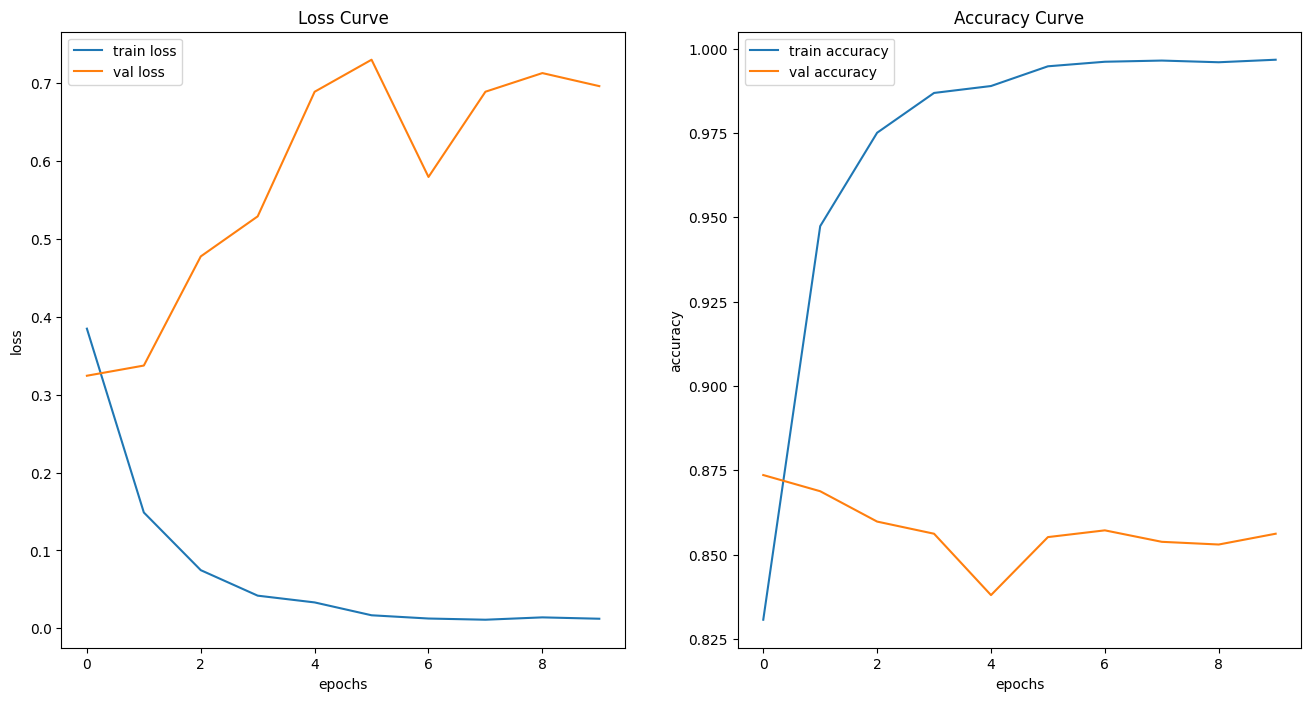

time: 1.59 s (started: 2024-09-17 14:22:27 +00:00)


In [75]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

In [77]:
# 테스트 데이터에 대해서도 똑같이 전처리 해줌.

test['review'] = test['review'].apply(preprocess)

test_sequence = tokenizer.texts_to_sequences(test['review'])
test_padded = pad_sequences(test_sequence,
              maxlen=150,
              padding= 'pre',
              truncating= 'pre')

<ipython-input-50-2c958277048e>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence, 'html.parser')


time: 23.2 s (started: 2024-09-17 14:28:08 +00:00)


In [78]:
y_pred = model.predict(test_padded)
pred = np.where(y_pred > 0.5, 1, 0)

pred

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

time: 5.23 s (started: 2024-09-17 14:29:16 +00:00)


In [ ]:
# 아래 코드는 실행되지 않을 것임. 왜냐하면 테스트 데이터 셋에는 라벨링이 되어 있지 않기 때문이다!

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# 정확도 계산
accuracy = accuracy_score(test['sentiment'], pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 분류 리포트 출력 (Precision, Recall, F1-Score 등)
print(classification_report(test['sentiment'], pred))